#**Projeto I - Aplicação de Métodos de Aprendizagem de Máquina.**

##Detecção de tipos de tumor de mama: Benignos e Malignos.

# **Etapa 01:**

> **Problemática**

Os tumores benignos crescem devagar e de forma limitada; já os tumores malignos, em geral, crescem rápido e tendem a ser invasivos. 

Segundo o Instituto Nacional de Câncer - INCA, há vários tipos de câncer de mama. Por isso, a doença pode evoluir de diferentes formas. Alguns tipos têm desenvolvimento rápido, enquanto outros crescem mais lentamente. 

Esses comportamentos distintos se devem a característica próprias de cada tumor.

E a incidência estimada de câncer de mama nas mulheres corresponde a 29,7%. Para fins de comparação, nenhum outro tipo de câncer, neste levantamento, ultrapassou a margem de 10%.


Fonte: < https://www.inca.gov.br/controle-do-cancer-de-mama/conceito-e-magnitude >

> **Objetivo**

Utilizaremos uma base de dados com dois tipos de tumores, são eles: Benignos e Malignos. De acordo com determinadas características (Features), vamos prever nossas respostas (Targets). 

Em resumo, vamos ensinar máquinas a realizar diagósticos (com a maior taxa de acerto possível), baseados em dados históricos e asssim otimizar o diagnóstico do paciênte para que ele possa iniciar o tratamento o quanto antes.

> **Especificação Técnica**

**Dataset:** Para desenvolvimento desse projeto, vamos trabalhar com um conjunto de dados do câncer de mama em Wisconsin, um estado dos EUA, disponível em: < https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) >.

**Formato**: A base de dados está em formato .DATA e possui 569 linhas, distribuidas entre 31 colunas.

> **Métodos de Pŕe-processamento:** 

Destaca-se como os pré-processsamento os seguintes passos:

* Limpeza da base: Para fins didáticos, estamos trabalhando com uma base de dados já pré-preparada, em resumo, sem campos nulos, ou dados faltantes.
* Transformação para DataFrame, pois ao transformar nossa base em dataframe poderemos trabalhar mais poderosamente nossos dados com à ajuda do pacote Pandas.

> **Tarefa de Aprendizado**: 

Será aplicado a tarefa de Classificação 

> **Algoritmos Avaliados**: 

Serão avaliados os seguintes algoritmos: Regressão Logística, Máquina de Vetores de Suporte e Floresta Aleatória.


## **Etapa 02:**

**01. Importando as bibliotecas:**

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import metrics # analisa a acurácia de nossos modelos

# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

**02. Importação do dataset:**

In [ ]:
# Existem várias bases de dados disponíveis de forma nátiva no pacote Sklearn do Python e vamos usar a load_breast_cancer.
# É o mesmo dataset do câncer de mama em Wisconsin.

from sklearn.datasets import load_breast_cancer #importando a base de dados nativas no sklearn

dados=load_breast_cancer() # Carregando base de dados

# Agora vamos ver a descrição de nossa base de dados:
print(dados.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Em resuno, vamos encontrar todas essas informações:**

* raio (média das distâncias do centro aos pontos no perímetro)
* textura (desvio padrão dos valores da escala de cinza)
* perímetro
* área
* suavidade (variação local nos comprimentos dos raios)
* compacidade (perímetro ^ 2 / área - 1,0)
* concavidade (severidade das porções côncavas do contorno)
* pontos côncavos (número de porções côncavas do contorno)
* simetria
* dimensão fractal ("aproximação do litoral" - 1)

In [ ]:
cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names) # Convertendo o nosso conjunto de dados para um dataframe com ajuda do Pandas.

cancer['Class']=dados.target # Agora estamos adicionando a nossa Target.

**03. Tranformando a base de dados em um DataFrame:**

In [ ]:
# Um dataframe Pandas parece muito com uma tabela Excel ou um banco de dados relacional, como o MySQL.

cancer.head(10) # Visualizando as 10 primeiras linhas de nosso dataframe.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


**04. Explorando a nossa base de dados:**

In [ ]:
# Vamos começar descobrindo as dimensões de nosso dataframe - Linhas X Colunas
cancer.shape

(569, 31)

São 30 colunas + a nossa target na última coluna ['Class'].

Nosso objetivo será, com base nas 30 colunas (nossas features), prever a classificação entre Maligno=0 e Benigno=1 (nossa target).

A target é a nossa variável de resposta, ela contêm dados reais sobre diagnósticos. Como vimos, nossas base de dados tem 569 linhas, ou seja, temos dados sobre 569 diagnósticos diferentes entre tumores benigno e maligno.





In [ ]:
# Vamos começar olhando como estão distribuidos estes diagnósticos:

# Distribuição de nossas classes
cancer['Class'].value_counts() # 1- Benigno 0 = Maligno

1    357
0    212
Name: Class, dtype: int64

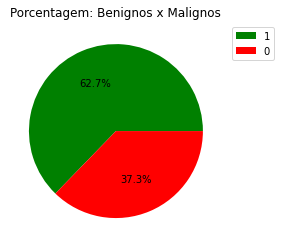

In [ ]:
# Obtemos a seguinte informação: 357 casos benignos e 212 casos malignos.

# Para termos uma visualização melhor, vamos criar um Gráfico de Pizza - ou no inglês um gráfico de torta (PiePlot):

colors=['#008000','#FF0000'] # Aqui apenas escolhemos as cores que serão utilizadas!

labels=cancer['Class'].value_counts().index
plt.pie(cancer['Class'].value_counts(),autopct='%1.1f%%',colors=colors) # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(labels,bbox_to_anchor=(1.25,1),) # Nossas Legendas
plt.title('Porcentagem: Benignos x Malignos')
plt.show()

# Reforçando que 1- Benigno 0 = Maligno

Como podemos ver, há mais casos de benignos do que de malignos. Entretando é importante que tenhamos uma quantidade balanceada de cada tipo para podermos construir nossos modelos.

A nossa base de dados não está muito desequilibrada, mesmo assim é importante que a balancearmos para que no futuro nosso modelo não fique bom apenas em prever casos benignos, ou apenas casos malignos, chamamos isso de **Overfitting**.



**Overfitting ou Sobreajuste** é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

**05. Limpeza dos dados:**

Partimos da ideia de ter uma base de dados mais "equilibrada" e como já sabemos que temos 357 diagnósticos benignos e 212 malignos, logo concluímos que vamos ter de excluir 145 casos benignos.

Para isso, vamos usar todos os casos malignos que temos a disposição (212), mais a mesma quantidade de casos benignos e assim totalizando 424 diagnósticos.

Dentre os 357 diagnósticos benignos, devemos escolher os melhores para compor a nova base de dados. Ou seja, dentre os 357 casos, vamos selecionar os melhores 212.

Existem diversos critérios que poderiamos levar em consideração! 

**Por exemplo:**

Possívelmente temos em nossa base de dados, registros ou no caso diagnósticos, onde nem todas as variáveis estão preenchidas, enquanto outros possuem todas as informações. 

Lógicamente deveriamos dar prioridade para os registros completos!

In [ ]:
# Neste projeto, para fins didáticos, estamos trabalhando com uma base de dados já pré preparada, ou seja, sem campos nulos, ou dados faltantes.

# Veja só:

# Misssing Values
cancer.isnull().sum() 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Class                      0
dtype: int64

Então como estamos trabalhando com apenas dados completos e igualmente confiáveis, nosso trabalho será apenas o de selecionar de forma aleatória, ou como chamamos, de forma rândomica os registros.

**06. Construção dos modelos:**

In [ ]:
# Vamos usar mais uma vez a biblioteca Sklearn
from sklearn.model_selection import train_test_split

# Primeiro, vamos dividir nossa base de dados entre features e target:
X= cancer.iloc[:,0:-1]# Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y=cancer.iloc[:,-1] # Selecionando todas as linhas da última coluna ['Class'].


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
# test-size: neste casos vamos dividir nosso dataset em 70% treino e 30% teste
# random_state: vamos selecionar de forma aleatória

In [ ]:
# Agora temos nossas bases de dados para treino e testes 
print('X treino',x_train.shape)
print('X test',x_test.shape)
print('Y treino',y_train.shape)
print('Y test',y_test.shape)

X treino (398, 30)
X test (171, 30)
Y treino (398,)
Y test (171,)


## **Etapa 03:**

**07. Modelos de Machine Learning:**

**I - Regressão Logística:**

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

In [ ]:
# Vamos importar o nosso modelo:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression() # Criando o modelo...
logreg.fit(x_train,y_train) # Treinando o modelo...
y_pred=logreg.predict(x_test) # Predizendo...
acc_logreg=round(metrics.accuracy_score(y_pred,y_test)*100,1) # Nesta etapa, vamos avaliar a acurácia. Ou seja, Previsões x Resultados.
print("{}% de acurácia".format(acc_logreg,)) # Exibindo o resultado...

97.1% de acurácia


**II - Máquina de Vetores de Suporte:**

Máquina de vetores de suporte (Support Vector Machines) é um conceito na ciência da computação para um conjunto de métodos de aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão.

In [ ]:
# Vamos importar o nosso modelo:
from sklearn.svm import SVC

svc=SVC() # Criando o modelo...
svc.fit(x_train,y_train) # Treinando o modelo...
y_pred=svc.predict(x_test) # Predizendo...
acc_svc=round(metrics.accuracy_score(y_pred,y_test)*100,1) # Nesta etapa, vamos avaliar a acurácia. Ou seja, Previsões x Resultados.
print(acc_svc,"% de acurácia") # Exibindo o resultado...

93.6 % de acurácia


**III - Floresta Aleatória:**

Trata-se de um método de aprendizagem de conjunto para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento.



In [ ]:
# Vamos importar o nosso modelo:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100) # Criando o modelo...
forest.fit(x_train,y_train) # Treinando o modelo...
y_pred=forest.predict(x_test) # Predizendo...
acc_forest=round(metrics.accuracy_score(y_pred,y_test)*100,1) # Nesta etapa, vamos avaliar a acurácia. Ou seja, Previsões x Resultados.
print(acc_forest,"% de acurácia") # Exibindo o resultado...

96.5 % de acurácia


**08. Avaliando a eficácia:**

In [ ]:
modelos=pd.DataFrame({'Modelos':['Regressão Logística','Máquina de Vetores de Suporte',\
                    'Floresta Aleatória'],\
         'Score':[acc_logreg,acc_svc,acc_forest]})

modelos.sort_values(by="Score", ascending=False)

,Modelos,Score
0,Regressão Logística,97.1
2,Floresta Aleatória,96.5
1,Máquina de Vetores de Suporte,93.6


**09. Conclusão:**



**Vamos voltar um pouco, vimos o % de acurácia de cada modelo, mas o que é isso?**

A acurácia é a proximidade de um resultado com o seu valor de referência real. Dessa forma, quanto maior a acurácia, mais próximo da referência ou valor real é o resultado encontrado.

**10. Referências:**

Data School: [Comparing Machine Learning Models in Scikit-Learn](https://www.youtube.com/watch?v=0pP4EwWJgIU)

Janio Martinez Bachmann: Credit Fraud - Dealing with imbalanced dataset > [Kaggle Notebook](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)

Pedro Marcelino: Comprehensive data exploration with Python > [Kaggle Notebook](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

Manav Sehgal: Titanic Data Science Solution > [Kaggle Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)